# Predicting the Adoptability of Shelter Animals: A Classification Analysis

### Group 2
### Members: 
- Audra Cornick
- Angela Yandrofski
- Nolan Vibhakar
- Rowan Murphy

In [1]:
#install.packages("kknn")
#install.packages("caret")
#install.packages("rlang")
#install.packages("gridExtra")

In [2]:
library(readr)
library(tidyverse)
library(ggplot2) 
library(dplyr) 
library(tidymodels)
library(caret) 
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.0     ✔ yardstick    1.3.2
✔ recipes      1.1.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::fil

## Summary

The largest problems animal shelters are facing in North America is a lack of space and people to care for the large number of animals they receive everyday. Each day across the United States in 2023, 13,000 animals entered shelters with many more still being on the streets as strays (1). Additionally many animals received by shelters have health conditions that need immediate attention or could potentially spread to other animals, which require more resources to ensure swift treatment of these animals and measures to prevent the spread of sickness within these facilities. It is important that shelters are able to make quick decisions about where they dedicate their limited resources and optimize the adoption process to ensure as many animals are able to find home as possible.
Our project uses animal shelter data from Long Beach Animal Shelter in California to predict whether or not an animal will be adopted based on their age, sex, animal type, intake condition, intake type, and length of stay at shelter. Using predictive analysis in R, we create a k-nearest neighbor model to predict if an animal is going to be adopted based on the features listed above. 
This analysis aims to help enhance adoption rates, so shelters can recognize which animals are unlikely to get adopted and tailor their outreach and marketing strategies to specifically promote the adoption of those animals. Additionally, better understanding which animals are at a higher risk of not being adopted allows shelters to allocate resources more effectively, by providing additional care and resources to help those that are unlikely to be adopted.  


## Introduction

Animal shelters provide a valuable service for both homeless animals and prospective pet owners, but more and more they are failing the animals due to being over capacity and having a lack of resources. The Shelter Animals Count Database describes the root of the problem as "more animals are entering shelters than are leaving them\" (2). Due to this, many animals must be gotten rid of before they even have a chance to be adopted. According to the Rescue Paws Foundation over 4000 animals are euthanised in US shelters per day (3). This is an animal treatment crisis, as shelters struggle to find animals new homes. While many people are interested in adopting from shelters, they aren't doing it at high enough rates compared to animal abandonment. For the sake of the animals and shelters' continued success in their mission, It is important to figure out how best to address this issue.

A report from Hill's Pet Nutrition says that one of the biggest obstacles in the way of pet adoption is guardians' unrealistic expectations (4). By examining the data on what prospective adopters look for in a pet, we can assess how shelters can address these issues. While certain qualities might be more desirable, shelters can focus their efforts on aiding those animals that might otherwise be overlooked. ASPCA suggests streamlining adoption processes, better matchmaking, and enhanced marketing are all valuable ways to increase adoption in shelters (5). All of these can be aided by analysis of adoption data. By figuring out what characteristics in animals are most relevant to adoption, shelters can focus their marketing efforts and resources into helping the animals that need it most. In our project, we will attempt to predict whether an animal will be adopted or not based on different descriptive factors of the animal, so that shelters are better equipped to find homes for as many animals as possible.

Research Question: Can we predict whether an animal will be adopted based on certain factors?

We used data from the Long Beach Animal Shelter which contains: 
|variable          |class         |description                           |
|:-----------------|:-------------|:-------------------------------------|
|animal_id         |character     |Unique identification for each animal. |
|animal_name       |character     |Name of the Animal (Blank value means name not known). Animals with "*" are given by shelter staff.  |
|animal_type       |factor        |Species name of the animal. |
|primary_color     |factor        |The predominant color of the animal. |
|secondary_color   |factor        |Additional coloring, less predominant than the primary color. |
|sex               |factor        |Altered Sex of the animal. |
|dob               |date          |Date of Birth (if blank, DOB unknown). |
|intake_date       |date          |Date on which Animal was brought to the shelter . |
|intake_condition  |factor        |Condition of animal at intake. |
|intake_type       |factor        |The reason for intake such as stray capture, wildlife captures, adopted but returned, owner surrendered etc. |
|intake_subtype    |factor        |The method or secondary manner in which the animal was admitted to the shelter. |
|reason_for_intake |factor        |The reason an owner surrendered their animal. |
|outcome_date      |date          |Exit or Outcome date such as date of adoption or date animal died. |
|crossing          |character     |Intersection/Cross street of intake or capture. |
|jurisdiction      |factor        |Geographical jurisdiction of where an animal originated. |
|outcome_type      |factor        |Outcome associated with animal - adopted, died, euthanized etc. |
|outcome_subtype   |factor        |Secondary manner in which the animal left the shelter, usually used to identify which program, group, or other data useful in measuring program efficiency. |
|latitude          |double        |The latitude of the crossing. |
|longitude         |double        |The longitude of the crossing. |
|outcome_is_dead   |logical       |Whether animal is dead at outcome. |
|was_outcome_alive |logical       |Whether animal was alive at outcome. |
|geopoint          |character     |Latitude and longitude of crossing. |

#### Table 0. Retrieved from (6)

## Methods and Results

In [3]:
animals <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-03-04/longbeach.csv", show_col_types = FALSE) 
head(animals)

animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,⋯,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,⋯,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
A693708,*charlien,dog,white,NA,Female,2013-02-21,2023-02-20,ill mild,stray,⋯,2023-02-26,"[2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806",Long Beach,euthanasia,ill severe,33.80479,-118.1889,TRUE,FALSE,"33.8047935, -118.1889261"
A708149,NA,reptile,brown,green,Unknown,NA,2023-10-03,normal,stray,⋯,2023-10-03,"`600 BLK E HARCOURT, LB 90805",Long Beach,rescue,other resc,33.86800,-118.2009,FALSE,TRUE,"33.8679994, -118.2009307"
A638068,NA,bird,green,red,Unknown,NA,2020-01-01,injured severe,wildlife,⋯,2020-01-01,"0 BLK GRAND AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,inj severe,33.76048,-118.1481,TRUE,FALSE,"33.7604783, -118.1480912"
A639310,NA,bird,white,gray,Unknown,NA,2020-02-02,ill severe,wildlife,⋯,2020-02-02,"0 BLK TEMPLE AVE, LONG BEACH, CA 90803",Long Beach,transfer,lbah,33.76246,-118.1597,FALSE,TRUE,"33.7624598, -118.1596777"
A618968,*morgan,cat,black,white,Female,2014-12-18,2018-12-18,injured severe,stray,⋯,2019-01-13,"0 BLK W ZANE ST, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.84950,-118.1949,FALSE,TRUE,"33.8495009, -118.1949053"
A730385,*brandon,rabbit,black,white,Neutered,2023-04-19,2024-10-18,normal,stray,⋯,2024-11-15,00 AQUARIUM WAY LONG BEACH CA 90802,Long Beach,adoption,web,33.76399,-118.1944,FALSE,TRUE,"33.7639859, -118.1944096"


To clean the data, we have decided to only select the variables animal_type, primary_color, sex, dob, intake_condition, intake_type, and outcome_type as we believe these variables would be the most relevant to helping us predict whether an animal is likely to be adopted or not. We also made sure to omit all the NA values in order to not skew the data analysis.

Additionally, because the outcome_type variable had so many different variations of results, we decided to group them into only 2 outcomes (Adopted vs Not Adopted) as that is what we are most interested in. So, we decided to create another variable called outcome_group to add our analysis of predicting adoptability.

In [4]:
#cleaning the data: 
animals <- animals %>% 
    select(animal_type, primary_color, sex, dob, intake_condition, intake_type, intake_date, outcome_date, outcome_type) %>% 
    #filter(animal_type != "other") %>%
    na.omit()

animals$outcome_group <- recode(animals$outcome_type,
  "adoption" = "Adopted",
  "foster" = "Adopted",
  "foster to adopt" = "Adopted",
  "homefirst" = "Adopted",
  "rescue" = "Adopted",
  .default = "Not Adopted"  # Everything else is considered "Not Adopted"
)

head(animals)

animal_type,primary_color,sex,dob,intake_condition,intake_type,intake_date,outcome_date,outcome_type,outcome_group
<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<date>,<date>,<chr>,<chr>
dog,white,Female,2013-02-21,ill mild,stray,2023-02-20,2023-02-26,euthanasia,Not Adopted
cat,black,Female,2014-12-18,injured severe,stray,2018-12-18,2019-01-13,rescue,Adopted
rabbit,black,Neutered,2023-04-19,normal,stray,2024-10-18,2024-11-15,adoption,Adopted
other,gray,Unknown,2019-04-12,under age/weight,wildlife,2019-06-12,2019-06-12,rescue,Adopted
cat,black,Unknown,2017-08-21,under age/weight,stray,2017-09-21,2017-09-23,rescue,Adopted
dog,cream,Spayed,2007-12-15,aged,owner surrender,2024-12-15,2024-12-21,rescue,Adopted


For our summarization of data, we decided to do a statistical overview of the whole dataset ("summary(animals)") in order to get a good general view of the categorical and numerical variables. We also decided to show how many animals are adopted vs not adopted to see if there are any biases and if there is enough data for both outcomes. Additionally, we decided to show a more detailed look of the different outcome types.

**Table 1: Summary of data**

In [5]:
#summary of the data: 
summary(animals)
summary_table <- table(animals$outcome_group)
summary_table

 animal_type        primary_color          sex                 dob            
 Length:26011       Length:26011       Length:26011       Min.   :1993-05-28  
 Class :character   Class :character   Class :character   1st Qu.:2016-07-01  
 Mode  :character   Mode  :character   Mode  :character   Median :2018-10-15  
                                                          Mean   :2018-07-30  
                                                          3rd Qu.:2022-01-12  
                                                          Max.   :2031-03-30  
 intake_condition   intake_type         intake_date        
 Length:26011       Length:26011       Min.   :2017-01-01  
 Class :character   Class :character   1st Qu.:2018-07-30  
 Mode  :character   Mode  :character   Median :2020-06-27  
                                       Mean   :2020-10-24  
                                       3rd Qu.:2023-04-08  
                                       Max.   :2024-12-31  
  outcome_date        outco


    Adopted Not Adopted 
      12327       13684 

**Table 2: Summary of Target**

In [6]:
table(animals$outcome_type)


               adoption           community cat                    died 
                   6156                     334                     585 
               disposal               duplicate              euthanasia 
                     45                      27                    4148 
                 foster         foster to adopt               homefirst 
                     10                     164                      86 
                missing                  rescue         return to owner 
                     54                    5911                    3107 
       return to rescue  return to wild habitat shelter, neuter, return 
                     46                     146                     896 
               transfer               transport   trap, neuter, release 
                   4128                     133                      35 

**Table 3: Summary of Intake Condition Variable**

In [7]:
table(animals$intake_condition)


              aged     behavior  mild behavior  moderate   behavior  severe 
               155                 68                124                 68 
             feral          fractious         i/i report           ill mild 
               278                634                224               1040 
    ill moderatete         ill severe      injured  mild  injured  moderate 
               759                991                710                780 
   injured  severe         intakeexam             normal   under age/weight 
              1393                  1              12762               5964 
  welfare seizures 
                60 

### Exploratory Analysis Visualizations 

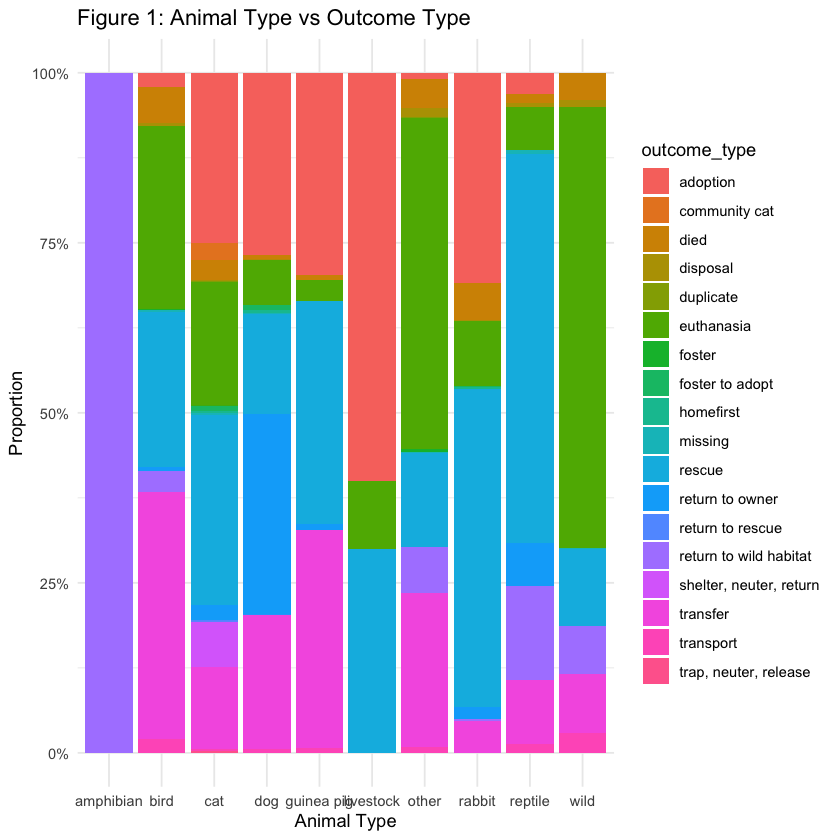

In [8]:
#Visualization of animal type vs outcome type / outcome group

ggplot(animals, aes(x = animal_type, fill = outcome_type)) +
  geom_bar(position = "fill") +  
  labs(title = "Figure 1: Animal Type vs Outcome Type",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)  

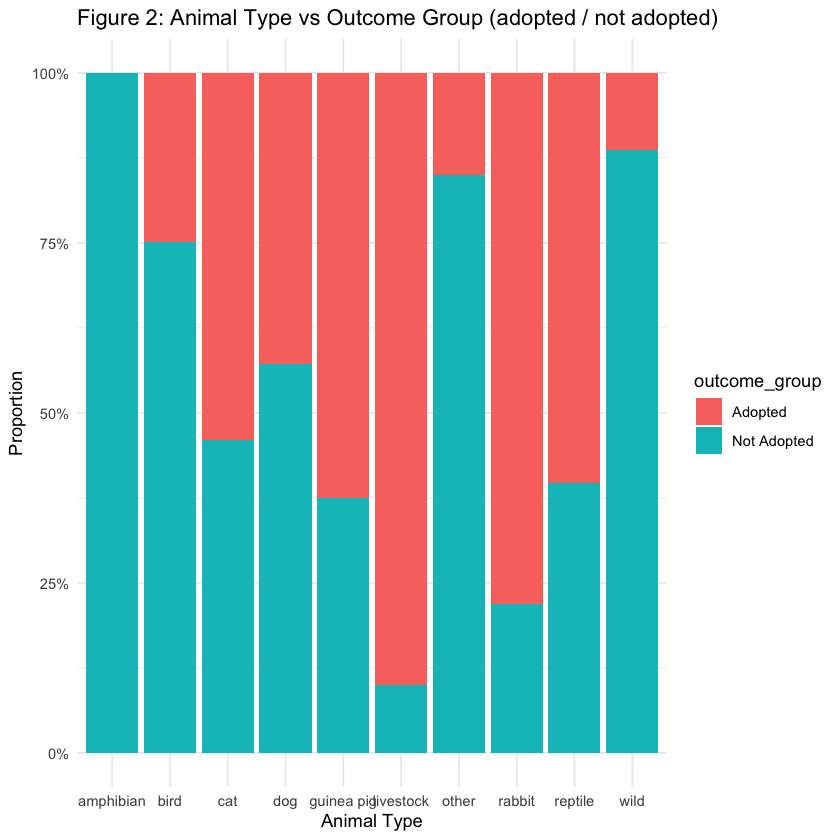

In [9]:
ggplot(animals, aes(x = animal_type, fill = outcome_group)) +
  geom_bar(position = "fill") + 
  labs(title = "Figure 2: Animal Type vs Outcome Group (adopted / not adopted)",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

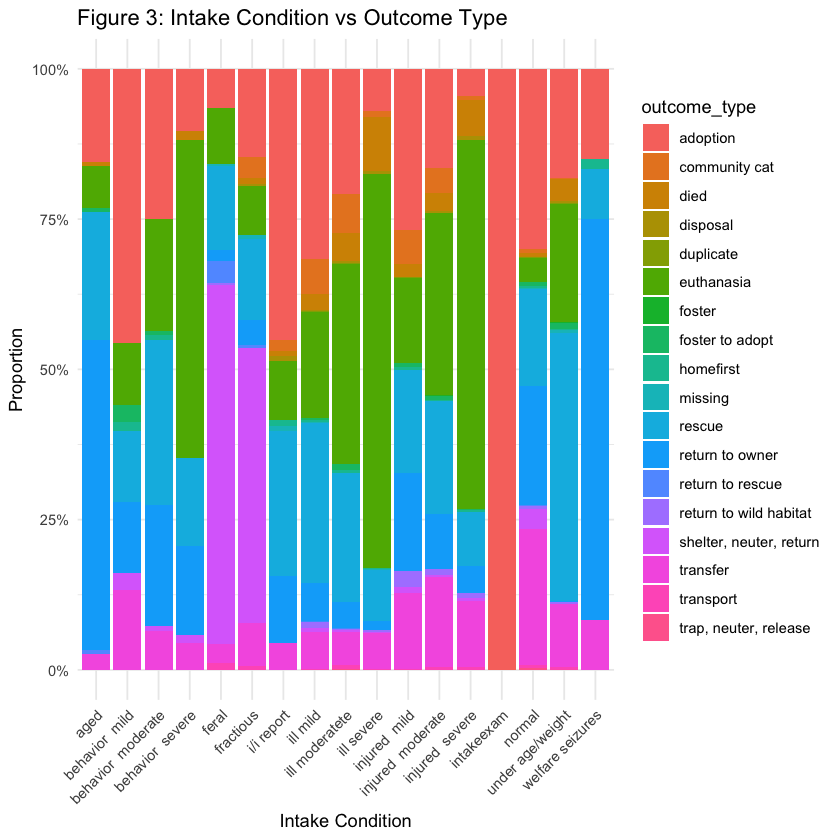

In [12]:
#visualization of intake condition vs outcome type / outcome group 

ggplot(animals, aes(x = intake_condition, fill = outcome_type)) +
  geom_bar(position = "fill") + 
  labs(title = "Figure 3: Intake Condition vs Outcome Type",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

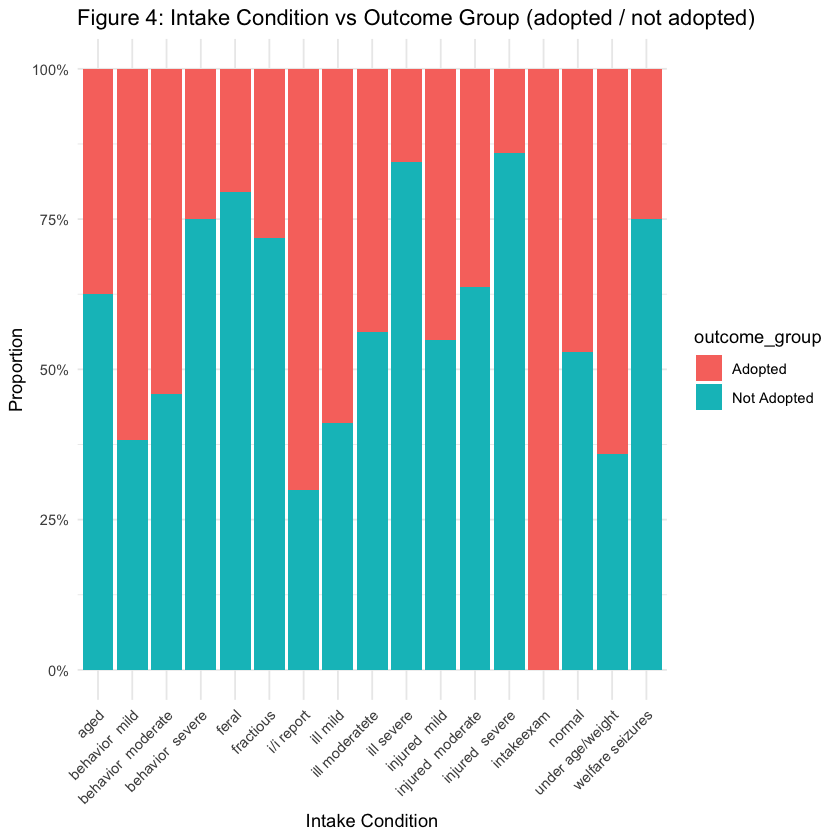

In [13]:
ggplot(animals, aes(x = intake_condition, fill = outcome_group)) +
  geom_bar(position = "fill") +
  labs(title = "Figure 4: Intake Condition vs Outcome Group (adopted / not adopted)",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Explanation of Relevance:** Based on figures 3 and 4 we can see there is a clear relationship between animals that are severely ill and/or injured, feral, have welfare seizures, and have severe behavioral problems when they arrive at the shelter and not having a high adoptability rate later on. This can also be explained by looking at the Intake Condition vs Outcome Type visualization, as we can see that there are high rates of ethunaisa for animals that have severe behavior or are severely injured at intake. These visualizations are relevant to our question because it shows that animals that need more care are less likely to get adopted, this could be attributed to the animal sadly passing away while at the animal shelter or people being less likely to adopt animals that might need more care (whether thats due to financial concerns or otherwise). This is important as it shows that animal shelters could focus on helping these animals get adopted more often through appealing emotionally to the public or expanding their reach to 'market' the shelter animals to a wider audience that may be more willing to take in animals that require more care.  

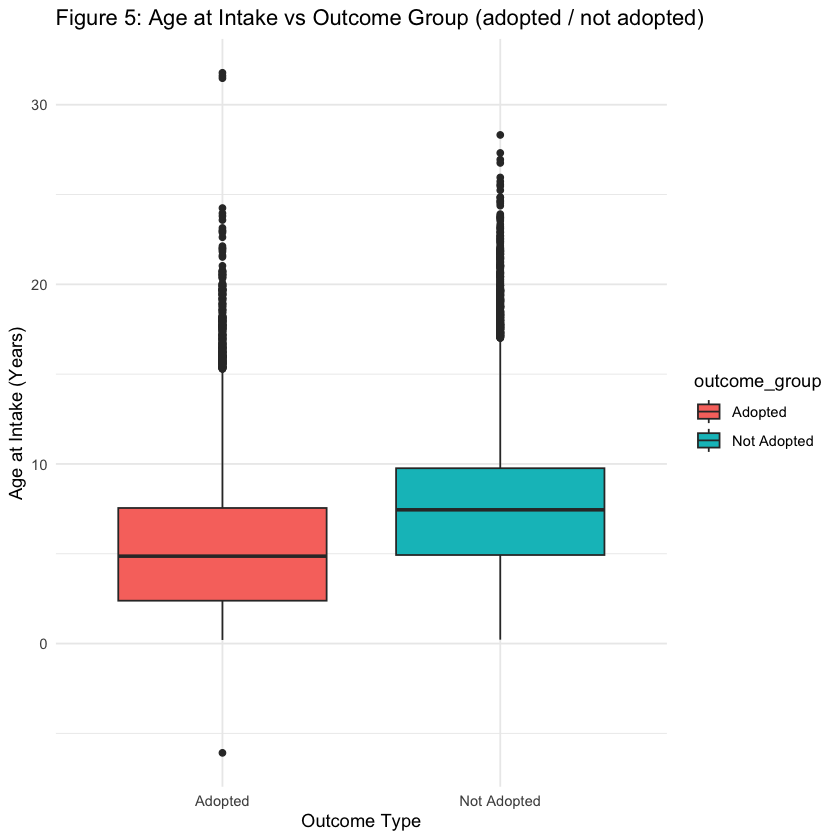

In [14]:
animals$age_at_intake <- as.numeric(difftime(Sys.Date(), animals$dob, units = "days")) / 365

# Boxplot of age at intake vs outcome_type
ggplot(animals, aes(x = outcome_group, y = age_at_intake, fill = outcome_group)) +
  geom_boxplot() +
  labs(title = "Figure 5: Age at Intake vs Outcome Group (adopted / not adopted)",
       x = "Outcome Type",
       y = "Age at Intake (Years)") +
  theme_minimal()

**Explanation of Relevance:** Based on figure 5, we can see that the median age for animals that end up being adopted is slightly lower than those that don't end up getting adopted. However, both groups have a large number of outliers for much older animals. The adopted group has a lower median age and a wider range toward younger ages. This is relevant because it shows that there is a clear preference for younger animals, and animals that are on the older side don't tend to be adopted as frequently. This means there could be an improvement in how the animal shelter uses its resources in promoting the adoption of older animals. 

### Feature Engineering 

In [15]:
animals$dob <- as.Date(animals$dob) 
intake_date <- as.Date(animals$intake_date) 
outcome_date <- as.Date(animals$outcome_date)

animals <- animals |> 
  mutate(days_in_shelter = outcome_date - intake_date, age_in_days = outcome_date - dob)

Since studies have shown that the longer animals have been in a shelter, the less likely they are to be adopted. In order to utilize this knowledge as a feature we have created the days_in_shelter feature by finding the number of days they were in the shelter from their intake day to their outcome day.

Additionally, many pets are more likely to be adopted when they are young, with older animals being less likely to get adopted. If we were to just use their date of birth as the predictor it would not actually account for how old the animal is was when the left the shelter. To better represent that age we have created the age_in_days feature, which calculates the number of days old the animal was one their outcome day using dob and outcome_date.

In [16]:
animals <- animals |> 
  mutate(age_in_days = as.numeric(age_in_days), days_in_shelter = as.numeric(days_in_shelter)) |> 
  select('animal_type', 'sex', 'intake_condition', 'intake_type', 'days_in_shelter', 'age_in_days', 'outcome_group')
head(animals)

animal_type,sex,intake_condition,intake_type,days_in_shelter,age_in_days,outcome_group
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
dog,Female,ill mild,stray,6,3657,Not Adopted
cat,Female,injured severe,stray,26,1487,Adopted
rabbit,Neutered,normal,stray,28,576,Adopted
other,Unknown,under age/weight,wildlife,0,61,Adopted
cat,Unknown,under age/weight,stray,2,33,Adopted
dog,Spayed,aged,owner surrender,6,6216,Adopted


### Classification Analysis

We currently have one large data set that contains all of our animal shelter observations. In order to be able to gauge the performance of our classification model we need to split it into two data set: training data and testing data.

We will use the training data (train_data) to build our model and tune our model and save our testing data (test_data) to test the final accuracy of the model on new, unseen data. This will give us an estimate of how the model would perform give unclassified, 'real-world' data.

In [17]:
# Splitting data into train and test data
set.seed(2)
data_split <- initial_split(animals, prop = 0.7, strata = outcome_group)
train_data <- training(data_split)
test_data <- testing(data_split)
head(train_data)

animal_type,sex,intake_condition,intake_type,days_in_shelter,age_in_days,outcome_group
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
cat,Female,injured severe,stray,26,1487,Adopted
rabbit,Neutered,normal,stray,28,576,Adopted
other,Unknown,under age/weight,wildlife,0,61,Adopted
dog,Neutered,normal,stray,7,371,Adopted
dog,Spayed,normal,owner surrender,3,583,Adopted
guinea pig,Female,normal,owner surrender,6,72,Adopted


Now we have to build our classification model.

We are using K-Nearest Neighbors as our classification model as it doesn't have an specific assumption about data distribution, it is robust to noise data, it is easy to implement and tune, and it is an efficient model since it does not require a training phase.

To tune our model, we are finding the accuracy of the model using different numbers of neighbors (k) from 1 to 25. The higher the k value, the more complex our model becomes, so it is important to ensure that the k is not too high and causing the model to over fit to our training data, and not be general enough to accurately predict the training data.

In [18]:
recipe <- recipe(outcome_group ~ ., data = train_data) %>%
  step_novel(all_nominal_predictors()) %>%  # Handle new levels
  step_dummy(all_nominal_predictors()) %>%  # Convert categorical to dummy variables
  step_normalize(days_in_shelter, age_in_days)        # Normalize the numerical predictor

knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |> 
  set_engine('kknn') |> 
  set_mode('classification')

shelter_vfold <- vfold_cv(train_data, v = 5, strata = outcome_group)

possible_k <- tibble(neighbors = seq(from = 1, to = 10))

knn_workflow <- workflow() |> 
  add_recipe(recipe) |> 
  add_model(knn_spec) |> 
  tune_grid(resamples = shelter_vfold, grid = possible_k) |> 
  collect_metrics()

accuracies <- knn_workflow |>
  filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7327794,5,0.003815230,Preprocessor1_Model01
2,accuracy,binary,0.7314613,5,0.003081068,Preprocessor1_Model02
3,accuracy,binary,0.7440954,5,0.003256649,Preprocessor1_Model03
4,accuracy,binary,0.7443150,5,0.003566538,Preprocessor1_Model04
5,accuracy,binary,0.7586512,5,0.002018382,Preprocessor1_Model05
6,accuracy,binary,0.7579370,5,0.001599587,Preprocessor1_Model06


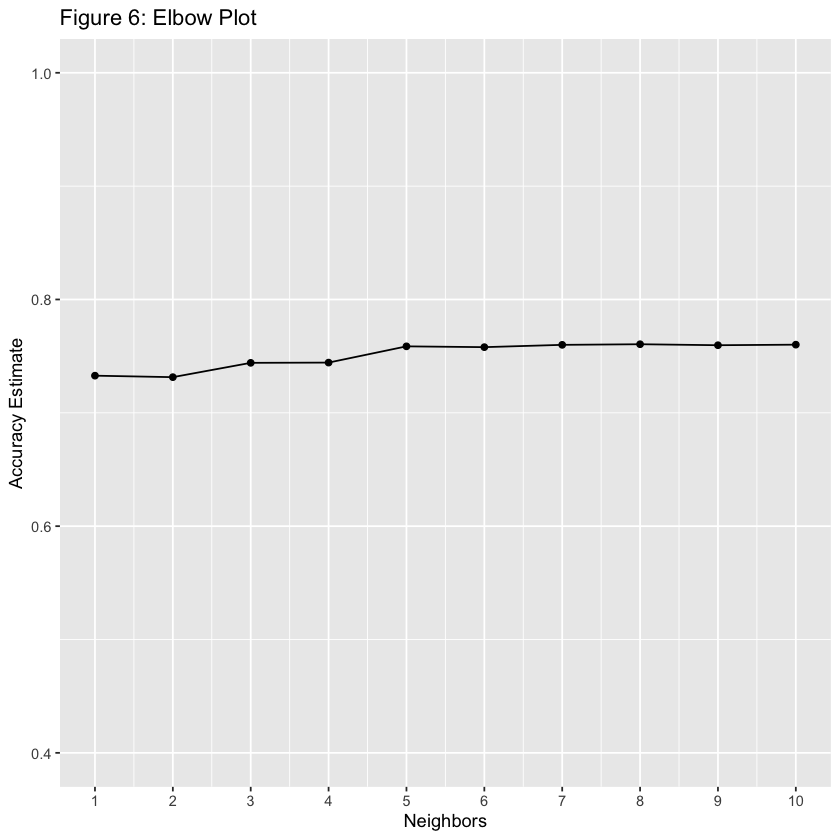

In [19]:
#graph results to find the k value that gives the best accuracy
accuracy_versus_k<-ggplot(accuracies, aes (x=neighbors, y=mean))+
  geom_point()+
  geom_line()+
  labs(title = "Figure 6: Elbow Plot", x= "Neighbors", y= "Accuracy Estimate")+
  scale_x_continuous(breaks=seq(0,25, by=1))+
  scale_y_continuous(limits=c(0.4, 1.0))
accuracy_versus_k

Using the elbow graph above, we found that the best number of neighbors (k) for our classification is 5. This is the point where any significant improvement in accuracy begins to plateau and choosing a k value that is larger could potentially lead to over fitting the model.

In [20]:
knn_model <-nearest_neighbor(weight_func = 'rectangular', neighbors = 5) |> 
  set_engine('kknn') |> 
  set_mode('classification')

knn_fit <- workflow() |> 
  add_recipe(recipe) |> 
  add_model(knn_model) |> 
  fit(data = train_data)

predictions <- predict(knn_fit, new_data = test_data) |> 
  bind_cols(test_data)

predictions <- predictions %>%
  mutate(outcome_group = factor(outcome_group))

confusion_matrix <- conf_mat(predictions, truth = outcome_group, estimate = .pred_class)
print(confusion_matrix)

accuracy <- accuracy(predictions, truth = outcome_group, estimate = .pred_class)
print(accuracy)

             Truth
Prediction    Adopted Not Adopted
  Adopted        2880        1031
  Not Adopted     819        3075
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.763


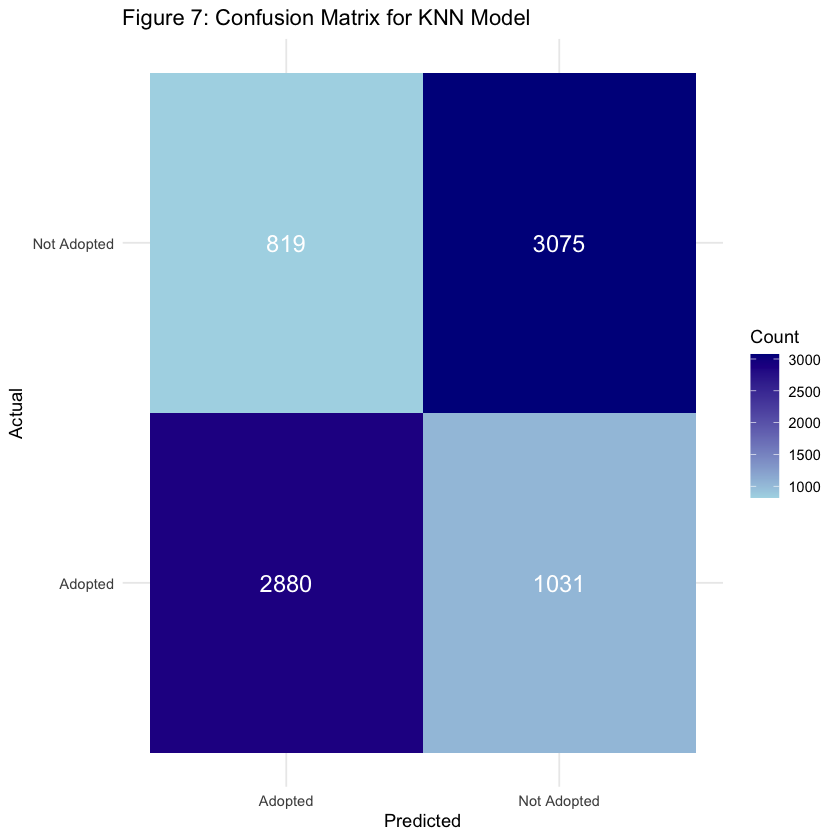

In [21]:
cm_tibble <- confusion_matrix$table %>% 
  as_tibble() %>%
  rename(Truth = 1, Prediction = 2, Count = 3)

ggplot(cm_tibble, aes(x = Prediction, y = Truth, fill = Count)) +
  geom_tile() +
  geom_text(aes(label = Count), color = "white", size = 5) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Figure 7: Confusion Matrix for KNN Model", x = "Predicted", y = "Actual", fill = "Count") +
  theme_minimal()

## Discussion

With a final accuracy of around 76%, we can fairly confidently state that we were able to successfully predict whether or not an animal would be adopted, at least to an extent. Unfortunately, one of the shortcomings of our chosen analysis model is the lack of feature importances. K nearest neighbours is a non-parametric model, meaning that it does not use coefficients to make its predictions, and as such it is unclear which features in this model contributed the most to this final result. However, what we have produced still serves as a valuable tool for shelter owners as a pre-trained model designed to predict whether or not an animal will be adopted. Overall, we are glad to see that our model functions well as it currently exists, but room for improvement still remains. An accuracy of 76% is good, but not fantastic, and we would be able to gain even more information by utilizing a model that would allow us to determine which specific factors contribute to an animal being adopted or not. These are important questions to consider in the future, and can be easily developed with further analysis of this data.

## References

1. Best Friends Animal Society. (n.d.). Animal welfare statistics. Best Friends. https://bestfriends.org/no-kill-2025/animal-welfare-statistics#:~:text=Each%20day%20in%202023%20across,dogs%20and%20cats%20last%20year. 
2. Sac. “Pet Euthanasia Rates Are at a 3-Year High, but Experts Say There Are Ways to Help besides Adoption.” Shelter Animals Count, 17 Sept. 2023, www.shelteranimalscount.org/pet-euthanasia-rates-are-at-a-3-year-high-but-experts-say-there-are-ways-to-help-besides-adoption/.
3. “Saving Companion Animals from Inhumane Conditons.” Our Cause for Paws - Ourcauseforpaws.Org, www.ourcauseforpaws.org/blogs/news/saving-companion-animals-from-inhumane-conditons?gad_source=1&gclid=Cj0KCQiA2oW-BhC2ARIsADSIAWq1F3Lnd2Skw3YVgVHO5VoI_1YCFx22YWl-eJ9mrUaJ4HX_dxgdrOYaAu1YEALw_wcB. Accessed 28 Feb. 2025.
4. 2023 State of Shelter Adoption Report, Hill’s Pet Nutrition, theaawa.org/wp-content/uploads/2023/11/hills-pet-nutrition-2023-state-of-shelter-adoption-report.pdf.
5. “Effective Tips to Boost Adoptions: Reduce Barriers & Improve Experience.” ASPCApro, 11 Sept. 2024, www.aspcapro.org/resource/effective-tips-boost-adoptions-reduce-barriers-improve-experience.
6. Rfordatascience. “Tidytuesday/Data/2025/2025-03-04 at Main · Rfordatascience/Tidytuesday.” GitHub, github.com/rfordatascience/tidytuesday/tree/main/data/2025/2025-03-04. Accessed 28 Feb. 2025. 